# Handling Imbalanced Dataset

Having class imbalance (one class has significantly fewer samples than the other(s)) often leads to models that are biased towards the majority class and have poor performance on the minority class.

Common Techniques:
1. Undersampling: Reducing the number of samples in the majority class.
2. Oversampling: Increasing the number of samples in the minority class.
3. SMOTE (Synthetic Minority Over-Sampling Technique): Generating synthetic samples for the minority class.
4. Class Weights: Penalizing the model for misclassifying the minority class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from collections import Counter

print("Libraries imported successfully.")


Libraries imported successfully.


In [2]:
df = pd.read_csv('./data/imbalanced_dataset.csv')
df.head()

,Feature 1,Feature 2,Target
0,-0.412582,0.957446,0
1,1.599281,1.337400,1
2,-0.516710,0.344830,0
3,-2.006680,1.932433,0
4,-0.559352,1.253855,0


In [3]:
print(f"Original Class Distribution: {Counter(df['Target'])}")

Original Class Distribution: Counter({0: 9900, 1: 100})


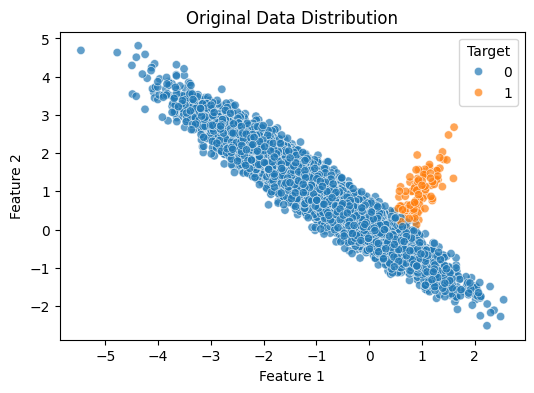

In [4]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Target', alpha=0.7)
plt.title('Original Data Distribution')
plt.show()

#### Baseline Model Performance

In [5]:
X = df[['Feature 1', 'Feature 2']]
y = df['Target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1976    0]
 [   6   18]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1976
           1       1.00      0.75      0.86        24

    accuracy                           1.00      2000
   macro avg       1.00      0.88      0.93      2000
weighted avg       1.00      1.00      1.00      2000



## 1. Techniques to Handle Imbalance

### 1. Random Undersampling

We randomly remove samples from the majority class to match the minority class count.

In [9]:
# !pip install imblearn

In [11]:
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(random_state=42)

X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)

print(f"Resampled Class Distribution (Random Under-Sampling): {Counter(y_resampled_rus)}")

model_rus = LogisticRegression()
model_rus.fit(X_resampled_rus, y_resampled_rus)
y_pred_rus = model_rus.predict(X_test)


print("Confusion Matrix after Random Under-Sampling:")
print(confusion_matrix(y_test, y_pred_rus))
print("\nClassification Report after Random Under-Sampling:")
print(classification_report(y_test, y_pred_rus))

Resampled Class Distribution (Random Under-Sampling): Counter({0: 76, 1: 76})
Confusion Matrix after Random Under-Sampling:
[[1921   55]
 [   0   24]]

Classification Report after Random Under-Sampling:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1976
           1       0.30      1.00      0.47        24

    accuracy                           0.97      2000
   macro avg       0.65      0.99      0.73      2000
weighted avg       0.99      0.97      0.98      2000



### 2. Random Oversampling

We randomly duplicate samples from the minority class to match the majority class count.

In [12]:
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler(random_state=42)

X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)

print(f"Resampled Class Distribution (Random Over-Sampling): {Counter(y_resampled_ros)}")
model_ros = LogisticRegression()
model_ros.fit(X_resampled_ros, y_resampled_ros)
y_pred_ros = model_ros.predict(X_test)
print("Confusion Matrix after Random Over-Sampling:")
print(confusion_matrix(y_test, y_pred_ros))
print("\nClassification Report after Random Over-Sampling:")
print(classification_report(y_test, y_pred_ros))

Resampled Class Distribution (Random Over-Sampling): Counter({0: 7924, 1: 7924})
Confusion Matrix after Random Over-Sampling:
[[1956   20]
 [   1   23]]

Classification Report after Random Over-Sampling:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1976
           1       0.53      0.96      0.69        24

    accuracy                           0.99      2000
   macro avg       0.77      0.97      0.84      2000
weighted avg       0.99      0.99      0.99      2000



### 3. SMOTE (Synthetic Minority Over-Sampling Technique)

Instead of duplicates, SMOTE creates synthetic samples by interpolating between existing minority samples.

![](https://miro.medium.com/0*2ZvjINsKRSiZmdrR.jpg)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

print(f"Resampled Class Distribution (SMOTE): {Counter(y_resampled_smote)}")

model_smote = LogisticRegression()
model_smote.fit(X_resampled_smote, y_resampled_smote)
y_pred_smote = model_smote.predict(X_test)
print("Confusion Matrix after SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report after SMOTE:")
print(classification_report(y_test, y_pred_smote))

Resampled Class Distribution (SMOTE): Counter({0: 7924, 1: 7924})
Confusion Matrix after SMOTE:
[[1961   15]
 [   1   23]]

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1976
           1       0.61      0.96      0.74        24

    accuracy                           0.99      2000
   macro avg       0.80      0.98      0.87      2000
weighted avg       0.99      0.99      0.99      2000



### 4. Class Weights

we can also tell the model to pay more attention to the minority class during training.

In [14]:
model_cv = LogisticRegression(class_weight='balanced')
model_cv.fit(X_train, y_train)
y_pred_cv = model_cv.predict(X_test)
print("Confusion Matrix with Class Weighting:")
print(confusion_matrix(y_test, y_pred_cv))
print("\nClassification Report with Class Weighting:")
print(classification_report(y_test, y_pred_cv))

Confusion Matrix with Class Weighting:
[[1955   21]
 [   1   23]]

Classification Report with Class Weighting:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1976
           1       0.52      0.96      0.68        24

    accuracy                           0.99      2000
   macro avg       0.76      0.97      0.84      2000
weighted avg       0.99      0.99      0.99      2000

